In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [3]:
print('---review---')
print(X_train[6])
print('---label---')
print(y_train[6])

---review---
[1, 2, 365, 1234, 5, 1156, 354, 11, 14, 2, 2, 7, 1016, 2, 2, 356, 44, 4, 1349, 500, 746, 5, 200, 4, 4132, 11, 2, 2, 1117, 1831, 2, 5, 4831, 26, 6, 2, 4183, 17, 369, 37, 215, 1345, 143, 2, 5, 1838, 8, 1974, 15, 36, 119, 257, 85, 52, 486, 9, 6, 2, 2, 63, 271, 6, 196, 96, 949, 4121, 4, 2, 7, 4, 2212, 2436, 819, 63, 47, 77, 2, 180, 6, 227, 11, 94, 2494, 2, 13, 423, 4, 168, 7, 4, 22, 5, 89, 665, 71, 270, 56, 5, 13, 197, 12, 161, 2, 99, 76, 23, 2, 7, 419, 665, 40, 91, 85, 108, 7, 4, 2084, 5, 4773, 81, 55, 52, 1901]
---label---
1


In [4]:
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i) for i in X_train[6]])
print('---label---')
print(y_train[6])

---review with words---
['the', 'and', 'full', 'involving', 'to', 'impressive', 'boring', 'this', 'as', 'and', 'and', 'br', 'villain', 'and', 'and', 'need', 'has', 'of', 'costumes', 'b', 'message', 'to', 'may', 'of', 'props', 'this', 'and', 'and', 'concept', 'issue', 'and', 'to', "god's", 'he', 'is', 'and', 'unfolds', 'movie', 'women', 'like', "isn't", 'surely', "i'm", 'and', 'to', 'toward', 'in', "here's", 'for', 'from', 'did', 'having', 'because', 'very', 'quality', 'it', 'is', 'and', 'and', 'really', 'book', 'is', 'both', 'too', 'worked', 'carl', 'of', 'and', 'br', 'of', 'reviewer', 'closer', 'figure', 'really', 'there', 'will', 'and', 'things', 'is', 'far', 'this', 'make', 'mistakes', 'and', 'was', "couldn't", 'of', 'few', 'br', 'of', 'you', 'to', "don't", 'female', 'than', 'place', 'she', 'to', 'was', 'between', 'that', 'nothing', 'and', 'movies', 'get', 'are', 'and', 'br', 'yes', 'female', 'just', 'its', 'because', 'many', 'br', 'of', 'overly', 'to', 'descent', 'people', 'time', 

In [5]:
print('Maximum review length: {}'.format(
len(max((X_train + X_test), key=len))))

Maximum review length: 2697


In [6]:
print('Minimum review length: {}'.format(
len(min((X_test + X_test), key=len))))

Minimum review length: 14


In [7]:
from keras.preprocessing import sequence
max_words = 200
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [8]:
X_train[0]

array([   5,   25,  100,   43,  838,  112,   50,  670,    2,    9,   35,
        480,  284,    5,  150,    4,  172,  112,  167,    2,  336,  385,
         39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,    4,
        192,   50,   16,    6,  147, 2025,   19,   14,   22,    4, 1920,
       4613,  469,    4,   22,   71,   87,   12,   16,   43,  530,   38,
         76,   15,   13, 1247,    4,   22,   17,  515,   17,   12,   16,
        626,   18,    2,    5,   62,  386,   12,    8,  316,    8,  106,
          5,    4, 2223,    2,   16,  480,   66, 3785,   33,    4,  130,
         12,   16,   38,  619,    5,   25,  124,   51,   36,  135,   48,
         25, 1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,
         14,  407,   16,   82,    2,    8,    4,  107,  117,    2,   15,
        256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,
        476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,
         88,    4,  381,   15,  297,   98,   32, 20

In [9]:
# from keras import Sequential
# from keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D
# embedding_size=200
# model=Sequential()
# model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
# model.add(Conv1D(32, kernel_size=5,
#                  activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Dropout(0.5))
# model.add(LSTM(100))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))
# print(model.summary())

In [10]:
from keras.layers import Embedding
from keras.models import Sequential, Model
from keras.layers import Dense, Activation
from keras.layers import Flatten, Conv1D, SpatialDropout1D, MaxPooling1D,AveragePooling1D, Bidirectional, merge, concatenate, Input, Dropout, LSTM

def model(embedding_size=200, max_words=200, y_dim=1, num_filters=200, filter_sizes=[3,4,5], pool_padding='valid', dropout=0.5):
    embed_input = Input(shape=(max_words,))
    x = Embedding(vocabulary_size, embedding_size, input_length=max_words)(embed_input)
    pooled_outputs = []
    for i in range(len(filter_sizes)):
        conv = Conv1D(num_filters, kernel_size=filter_sizes[i], padding='valid', activation='relu')(x)
        conv = MaxPooling1D(pool_size=max_words-filter_sizes[i]+1)(conv)           
        pooled_outputs.append(conv)
    merge = concatenate(pooled_outputs)
    
    x = Dense(30, activation='relu')(merge)
    x = Dropout(dropout)(x)
    x = Bidirectional(LSTM(100, return_sequences=True, dropout=0.5, recurrent_dropout=0.1))(x)
    x = Dense(30, activation='relu')(x)
    x = Dropout(dropout)(x)
    x = Flatten()(x)
    x = Dense(y_dim, activation='sigmoid')(x)

    model = Model(inputs=embed_input,outputs=x)

#   model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics = ['acc'])
    print(model.summary())
    
    from keras.utils import plot_model
    plot_model(model, to_file='shared_input_layer.png')
    
    return model


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 200, 200)     1000000     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 198, 200)     120200      embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 197, 200)     160200      embedding_1[0][0]                
__________________________________________________________________________________________________
conv1d_3 (

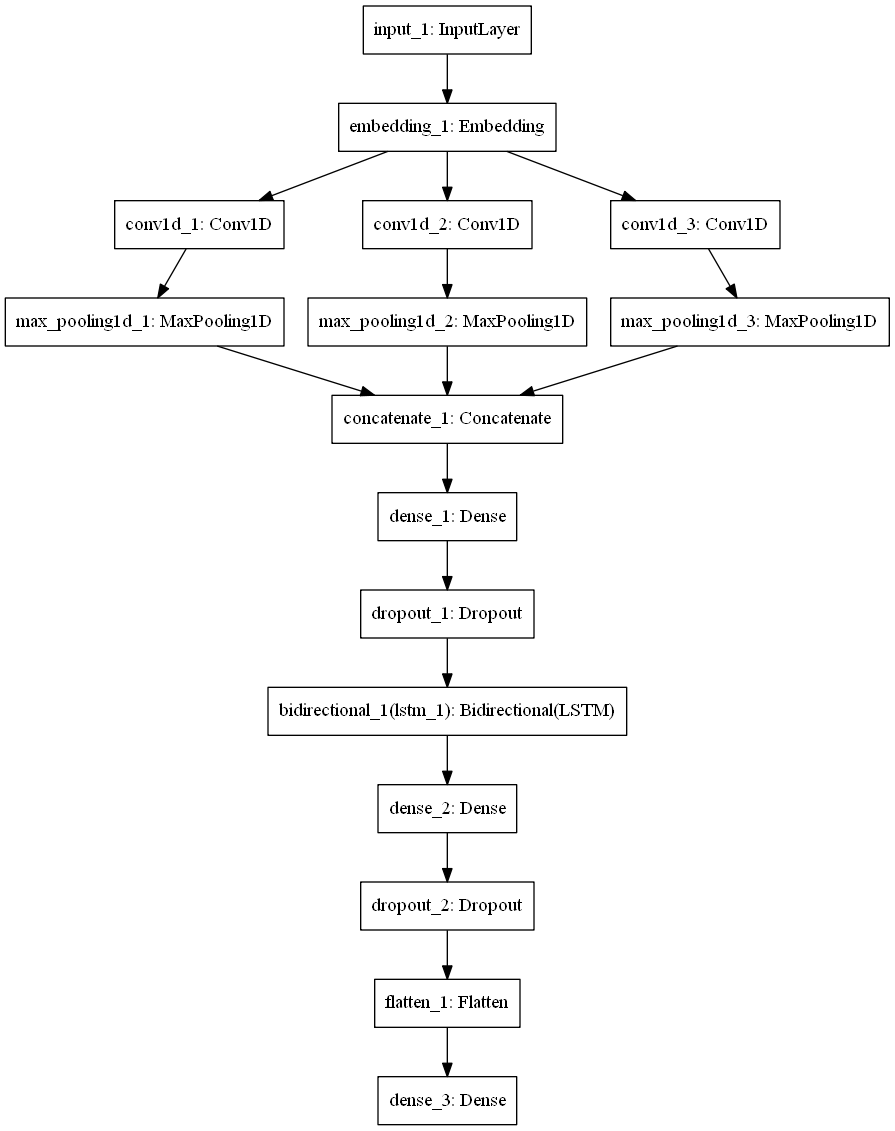

In [11]:
model = model(embedding_size=200, max_words=200,y_dim=1,filter_sizes = [3,4,5],dropout=0.5)
from IPython.display import Image
Image(filename='shared_input_layer.png') 

In [12]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [13]:
batch_size = 64
num_epochs = 3
X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train2, y_train2 = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train2, y_train2, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Train on 24936 samples, validate on 64 samples
Epoch 1/3
24936/24936 [==============================] - 32s 1ms/step - loss: 0.5412 - acc: 0.7042 - val_loss: 0.2903 - val_acc: 0.8594
Epoch 2/3
24936/24936 [==============================] - 27s 1ms/step - loss: 0.3498 - acc: 0.8521 - val_loss: 0.2512 - val_acc: 0.9219
Epoch 3/3
24936/24936 [==============================] - 28s 1ms/step - loss: 0.2617 - acc: 0.9012 - val_loss: 0.2756 - val_acc: 0.8906


In [14]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.88544
